Escrever um textinho bacana de introdução aqui

## Etapa 1


--- Totais ---
Quantidade Total de Vértices: 12
Quantidade Total de Arestas: 11
Quantidade Total de Arcos: 11

--- Requeridos ---
Quantidade de Vértices Requeridos: 7
Quantidade de Arestas Requeridas: 11
Quantidade de Arcos Requeridos: 11

--- Outros ---
Densidade do Grafo: 0.16666666666666666
Componentes Conectados: 1
Grau (mínimo, máximo): (1, 5)
Intermediação: {'4': 0, '3': 10, '10': 8, '2': 28, '11': 29, '12': 5, '7': 13, '9': 30, '5': 25, '6': 13, '8': 17, '1': 0}
Caminho Médio: 24.388429752066116
Diâmetro: 65


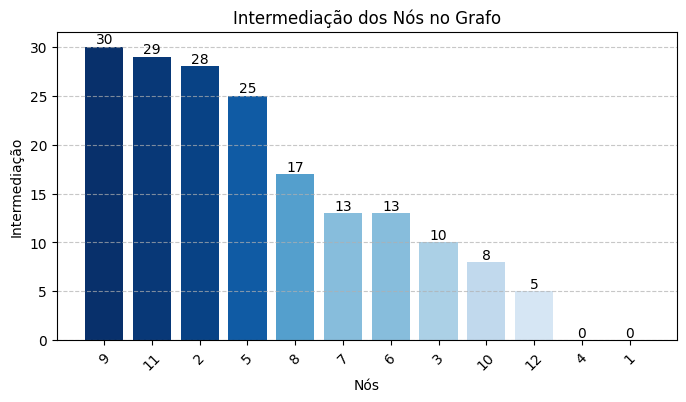

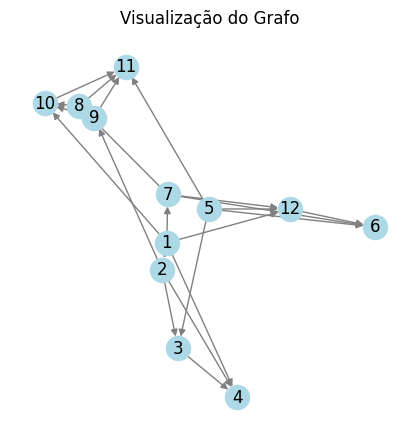

In [1]:
import sys
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
sys.path.append("../src")
sys.path.append("../data")

from leitura_dados import ler_arquivo
from estatisticas import *

grafo, capacidade_veiculo = ler_arquivo("../data/BHW1.dat")

print("\n--- Totais ---")
print(f"Quantidade Total de Vértices: {quantidade_vertices(grafo)}")
print(f"Quantidade Total de Arestas: {quantidade_arestas(grafo)}")
print(f"Quantidade Total de Arcos: {quantidade_arcos(grafo)}")

print("\n--- Requeridos ---")
print(f"Quantidade de Vértices Requeridos: {quantidade_vertices_requeridos(grafo)}")
print(f"Quantidade de Arestas Requeridas: {quantidade_arestas_requeridas(grafo)}")
print(f"Quantidade de Arcos Requeridos: {quantidade_arcos_requeridos(grafo)}")

print("\n--- Outros ---")
print("Densidade do Grafo:", densidade(grafo))
print("Componentes Conectados:", componentes_conectados(grafo))
print("Grau (mínimo, máximo):", grau_min_max(grafo))

caminhos, caminhos_completos = floyd_warshall(grafo)

print("Intermediação:", intermediacao(grafo, caminhos_completos)) 
print("Caminho Médio:", caminho_medio(caminhos))
print("Diâmetro:", diametro(caminhos))

# Dados da intermediação
intermediacao_dict = intermediacao(grafo, caminhos_completos)

# Ordenação dos nós pela intermediação (do maior para o menor)
nos_ordenados = sorted(intermediacao_dict.keys(), key=lambda x: intermediacao_dict[x], reverse=True)
valores_ordenados = [intermediacao_dict[no] for no in nos_ordenados]

# Criando o gráfico de barras
plt.figure(figsize=(8, 4))
valores_ordenados = np.array(valores_ordenados)  # Converte a lista em um array NumPy
norm = plt.Normalize(min(valores_ordenados), max(valores_ordenados))  # Normaliza os valores
colors = plt.cm.Blues(norm(valores_ordenados))  # Aplica coloração baseada na normalização

bars = plt.bar(nos_ordenados, valores_ordenados, color=colors)

# Adicionando os valores no topo das barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom', fontsize=10)

# Melhorias visuais
plt.xlabel("Nós")
plt.ylabel("Intermediação")
plt.title("Intermediação dos Nós no Grafo")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

G = nx.DiGraph()

for aresta in grafo.arestas:
    G.add_edge(aresta["de"], aresta["para"])

for arco in grafo.arcos:
    G.add_edge(arco["de"], arco["para"], color='red')  # Diferencie os arcos das arestas

plt.figure(figsize=(4, 4))
nx.draw(G, with_labels=True, node_color="lightblue", edge_color="gray", arrows=True)
plt.title("Visualização do Grafo")
plt.show()


## Etapa 2

Escrever outro textinho bacana aqui

In [ ]:
import sys
import os

sys.path.append("../src")

from leitura_dados import ler_arquivo
from heuristica_construtiva import heuristica_construtiva

# pastas de trabalho ----------------------------------------------------------
PASTA_IN  = "../data/"
PASTA_OUT = "../solucoes/"
os.makedirs(PASTA_OUT, exist_ok=True)

# -----------------------------------------------------------------------------
for arquivo in (f for f in os.listdir(PASTA_IN) if f.endswith(".dat")):
    print(f"\nProcessando: {arquivo}")

    # Leitura da instância e construção do grafo
    grafo = ler_arquivo(os.path.join(PASTA_IN, arquivo))

    custo_total, rotas, tempo_execucao = heuristica_construtiva(grafo)

    # -------------------------- grava arquivo de saída ------------------------
    saida = os.path.join(PASTA_OUT, f"sol-{arquivo}")
    with open(saida, "w") as f:
        f.write(f"{int(custo_total)}\n")
        f.write(f"{len(rotas)}\n")
        f.write(f"{tempo_execucao}\n")
        for i, (demanda_rota, custo_rota, rota) in enumerate(rotas, 1):
            total_visitas = len(rota)
            linha = f"0 1 {i} {demanda_rota} {int(custo_rota)} {total_visitas} "
            for serv in rota:
                tipo, id_s, ori, dest = serv
                if tipo == 'D':
                    linha += "(D 0,1,1) "
                else:
                    linha += f"(S {id_s},{ori},{dest}) "
            linha += "\n"
            f.write(linha)

    print(f"Solução salva em: {saida}")



Processando: mgval_0.25_9B.dat
Total de serviços criados:
  Nós: 22
  Arestas: 33
  Arcos: 57
Capacidade total de serviços:
  Nós: 168
  Arestas: 234
  Arcos: 252
  Total: 654
Total de serviços: 112
Solução salva em: ../solucoes/sol-mgval_0.25_9B.dat

Processando: mgval_0.25_5B.dat
Total de serviços criados:
  Nós: 18
  Arestas: 26
  Arcos: 42
Capacidade total de serviços:
  Nós: 151
  Arestas: 234
  Arcos: 229
  Total: 614
Total de serviços: 86
Solução salva em: ../solucoes/sol-mgval_0.25_5B.dat

Processando: mggdb_0.25_14.dat
Total de serviços criados:
  Nós: 5
  Arestas: 3
  Arcos: 12
Capacidade total de serviços:
  Nós: 23
  Arestas: 9
  Arcos: 57
  Total: 89
Total de serviços: 20
Solução salva em: ../solucoes/sol-mggdb_0.25_14.dat

Processando: mggdb_0.35_11.dat
Total de serviços criados:
  Nós: 12
  Arestas: 7
  Arcos: 22
Capacidade total de serviços:
  Nós: 83
  Arestas: 42
  Arcos: 99
  Total: 224
Total de serviços: 41
Solução salva em: ../solucoes/sol-mggdb_0.35_11.dat

Proce

KeyboardInterrupt: 